## Intrusion detection dataset

### Objectives:
The activity task is to build a network intrusion detector, a predictive model capable of distinguishing between bad connections, called
intrusions or attacks, and good, normal connections. This database contains a standard set of data to be audited, which includes a wide variety of intrusions in the network environment. Your target is building a machine efficient learning model using probabilistic approach models, probabilities of bad or goodconnections using naïve bayes model. This is a multi-class classification. Fine tune the model and make a model which has at least 97 percent accuracy.

### Importing Relevant Libaraies

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

### Reading the dataset into python

In [84]:
df = pd.read_csv('Data/tcp-connection (1).csv')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,b'udp',b'domain_u',b'SF',44,134,0,0,0,0,...,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'smtp',b'SF',1489,385,0,0,0,0,...,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
3,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
4,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'


In [85]:
df.shape

(494021, 42)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [87]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [155]:
df.isnull().sum()

duration                       0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_file_creations             0
num_shells                     0
num_access_files               0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
rerror_rate                    0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
intrusion 

### Insights:
- The dataset contains 494021 rows and 42 columns
- There are no null values
- The target column, that is the intrusion column specifies connections  as normal or various attacks

In [88]:
df.select_dtypes(include='object').head()

,protocol_type,service,flag,intrusion
0,b'udp',b'domain_u',b'SF',b'normal.'
1,b'tcp',b'smtp',b'SF',b'normal.'
2,b'icmp',b'ecr_i',b'SF',b'smurf.'
3,b'icmp',b'ecr_i',b'SF',b'smurf.'
4,b'tcp',b'private',b'S0',b'neptune.'


In [89]:
df['intrusion'].value_counts()

b'smurf.'              280790
b'neptune.'            107201
b'normal.'              97278
b'back.'                 2203
b'satan.'                1589
b'ipsweep.'              1247
b'portsweep.'            1040
b'warezclient.'          1020
b'teardrop.'              979
b'pod.'                   264
b'nmap.'                  231
b'guess_passwd.'           53
b'buffer_overflow.'        30
b'land.'                   21
b'warezmaster.'            20
b'imap.'                   12
b'rootkit.'                10
b'loadmodule.'              9
b'ftp_write.'               8
b'multihop.'                7
b'phf.'                     4
b'perl.'                    3
b'spy.'                     2
Name: intrusion, dtype: int64

In [90]:
df['protocol_type'].value_counts()

b'icmp'    283602
b'tcp'     190065
b'udp'      20354
Name: protocol_type, dtype: int64

In [91]:
df['service'].value_counts()

b'ecr_i'      281400
b'private'    110893
b'http'        64293
b'smtp'         9723
b'other'        7237
               ...  
b'X11'            11
b'tim_i'           7
b'tftp_u'          1
b'pm_dump'         1
b'red_i'           1
Name: service, Length: 66, dtype: int64

In [92]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serrer_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'intrusion'],
      dtype='object')

In [93]:
df['flag'].value_counts()

b'SF'        378440
b'S0'         87007
b'REJ'        26875
b'RSTR'         903
b'RSTO'         579
b'SH'           107
b'S1'            57
b'S2'            24
b'RSTOS0'        11
b'S3'            10
b'OTH'            8
Name: flag, dtype: int64

Cleaning categorical columns

In [94]:
df['intrusion'] = df['intrusion'].str.strip('b').str.replace("'", "")

In [95]:
df['protocol_type'] = df['protocol_type'].str.strip('b').str.replace("'", "")

In [96]:
df['service'] = df['service'].str.strip('b').str.replace("'", "")

In [97]:
df['flag'] = df['flag'].str.strip('b').str.replace("'", "")

In [98]:
df['intrusion'] = df['intrusion'].str.rstrip('.')

We are classifying attacks based on type namely:
- dos: Denial of Service attack
- u2r: User to Root attack
- r2l: Remote to user attack
- probe: probe attack
- normal: Normal connection

In [99]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [100]:
df.replace({'intrusion': attacks_types}, inplace = True)

In [101]:
df['intrusion'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: intrusion, dtype: int64

### Visualization

<AxesSubplot:xlabel='protocol_type', ylabel='count'>

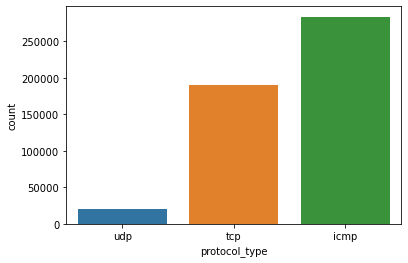

In [102]:
sns.countplot(x=df['protocol_type'])

### Insights:
- Protocols are set of rules that help in governing the way a particular technology will function for communication. In other words, it can be said that the protocols are digital languages implemented in the form of networking algorithms.
- Transmission Control Protocol (TCP): TCP is a popular communication protocol which is used for communicating over a network.
- User Datagram Protocol (UDP): UDP is a substitute communication protocol to Transmission Control Protocol implemented primarily for creating loss-tolerating and low-latency linking between different applications.
- Internet Control Message Protocol(ICMP): It is a supporting protocol and is used by networks devices like routers for sending error messages and operations information., e.g. the requested service is not available or that a host or router could not be reached. 

<AxesSubplot:xlabel='flag', ylabel='count'>

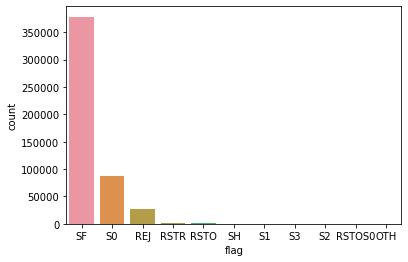

In [103]:
sns.countplot(x=df['flag'])

flags are used to indicate a particular state of connection or to provide some additional useful information like troubleshooting purposes or to handle a control of a particular connection.

### Feature Selection Using correlation

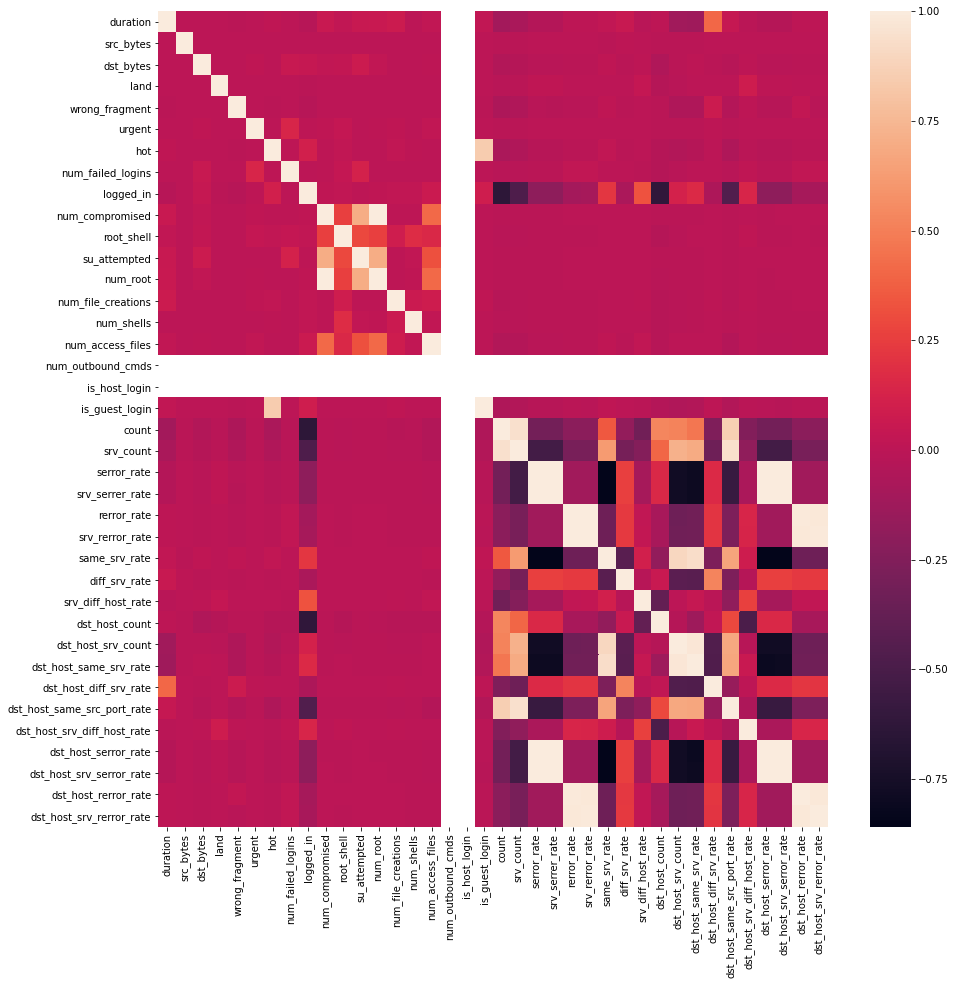

In [107]:
corr_matrix = df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix)
plt.show()

In [112]:
df['num_outbound_cmds'].value_counts()

0    494021
Name: num_outbound_cmds, dtype: int64

In [114]:
df['is_host_login'].value_counts()

0    494021
Name: is_host_login, dtype: int64

Since is_host_login and num_outbound_cmds only has 0's, we will drop those columns

In [115]:
df.drop(columns=['num_outbound_cmds', 'is_host_login'], axis = 1, inplace = True)

In [116]:
corr_matrix = df.corr()
corr_matrix

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.004258,0.005440,-0.000452,-0.003235,0.003786,0.013213,0.005239,-0.017265,0.058095,...,0.010074,-0.117515,-0.118458,0.406233,0.042642,-0.006983,-0.030400,-0.030612,0.006739,0.010465
src_bytes,0.004258,1.000000,-0.000002,-0.000020,-0.000139,-0.000005,0.004483,-0.000027,0.001701,0.000119,...,-0.001743,-0.003212,-0.002052,0.000578,-0.000724,0.001186,-0.000718,0.001122,-0.000393,0.001328
dst_bytes,0.005440,-0.000002,1.000000,-0.000175,-0.001254,0.016288,0.004365,0.049330,0.047814,0.023298,...,-0.048869,-0.005850,0.007058,-0.005314,-0.020143,0.008707,-0.011334,-0.011235,-0.005000,-0.005471
land,-0.000452,-0.000020,-0.000175,1.000000,-0.000318,-0.000017,-0.000295,-0.000065,-0.002784,-0.000038,...,-0.023671,-0.011587,0.001984,-0.000333,0.003799,0.083320,0.012658,0.007795,-0.001511,-0.001665
wrong_fragment,-0.003235,-0.000139,-0.001254,-0.000318,1.000000,-0.000123,-0.002106,-0.000467,-0.019908,-0.000271,...,-0.005191,-0.058624,-0.054903,0.071857,-0.031803,0.012092,-0.019091,-0.022104,0.029774,-0.011904
urgent,0.003786,-0.000005,0.016288,-0.000017,-0.000123,1.000000,0.000356,0.141996,0.006164,0.014285,...,-0.007139,-0.004540,-0.003279,0.010536,-0.002002,-0.000408,-0.001194,-0.001191,-0.000648,-0.000641
hot,0.013213,0.004483,0.004365,-0.000295,-0.002106,0.000356,1.000000,0.008740,0.105305,0.007348,...,-0.026366,-0.038730,-0.029117,0.001319,-0.052923,-0.004467,-0.019491,-0.020201,-0.006541,-0.007749
num_failed_logins,0.005239,-0.000027,0.049330,-0.000065,-0.000467,0.141996,0.008740,1.000000,-0.001145,0.006907,...,-0.025444,-0.015413,0.000507,0.001017,-0.009565,0.016001,-0.001945,-0.002453,0.024753,0.023584
logged_in,-0.017265,0.001701,0.047814,-0.002784,-0.019908,0.006164,0.105305,-0.001145,1.000000,0.013612,...,-0.621029,0.119315,0.161070,-0.061151,-0.461558,0.140493,-0.190955,-0.191704,-0.090868,-0.087885
num_compromised,0.058095,0.000119,0.023298,-0.000038,-0.000271,0.014285,0.007348,0.006907,0.013612,1.000000,...,-0.008361,-0.004797,-0.002584,0.000359,-0.006715,0.000621,-0.001978,-0.001631,-0.000843,-0.000873


In [117]:
df['num_root'].corr(df['num_compromised'])

0.9938277978763582

In [119]:
df['srv_serrer_rate'].corr(df['serror_rate'])

0.9983615072724913

In [120]:
df['srv_count'].corr(df['count'])

0.9436670688885331

In [121]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309539834008

In [122]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9736854572942031

In [123]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173405464

In [124]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.984803837116479

In [125]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705438862312

In [129]:
df['dst_host_srv_serror_rate'].corr(df['srv_serrer_rate'])

0.9993041091887024

**Dropping columns with high correlation value**

In [131]:
df.drop(columns=['num_root', 'srv_serrer_rate', 'srv_rerror_rate', 'dst_host_srv_serror_rate', 'dst_host_serror_rate', 'dst_host_rerror_rate', 
                'dst_host_srv_rerror_rate', 'dst_host_same_srv_rate'], axis = 1, inplace=True)

In [132]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,intrusion
0,0,udp,domain_u,SF,44,134,0,0,0,0,...,0.0,1.00,0.00,0.01,139,89,0.01,0.01,0.00,normal
1,0,tcp,smtp,SF,1489,385,0,0,0,0,...,0.0,1.00,0.00,1.00,5,116,0.00,0.20,0.02,normal
2,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,0.0,1.00,0.00,0.00,255,255,0.00,1.00,0.00,dos
3,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,0.0,1.00,0.00,0.00,255,255,0.00,1.00,0.00,dos
4,0,tcp,private,S0,0,0,0,0,0,0,...,0.0,0.03,0.07,0.00,255,6,0.07,0.00,0.00,dos


In [133]:
df.shape

(494021, 32)

### Encoding categorical columns

#### Label Encoding

In [134]:
le = LabelEncoder()
df['flag'] = le.fit_transform(df['flag'])
df['service'] = le.fit_transform(df['service'])

#### One-Hot Encoding

In [135]:
df = pd.get_dummies(data=df, columns=['protocol_type'])

In [136]:
df.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,intrusion,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,0,11,9,44,134,0,0,0,0,0,...,0.01,139,89,0.01,0.01,0.00,normal,0,0,1
1,0,50,9,1489,385,0,0,0,0,0,...,1.00,5,116,0.00,0.20,0.02,normal,0,1,0
2,0,14,9,1032,0,0,0,0,0,0,...,0.00,255,255,0.00,1.00,0.00,dos,1,0,0
3,0,14,9,1032,0,0,0,0,0,0,...,0.00,255,255,0.00,1.00,0.00,dos,1,0,0
4,0,45,5,0,0,0,0,0,0,0,...,0.00,255,6,0.07,0.00,0.00,dos,0,1,0


### Standardization/Normalization

In [137]:
X = df.drop('intrusion', axis =1)
y = df['intrusion']

In [138]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building Naive-Bayes Models

#### 1. Gaussian Naive-Bayes

In [140]:
gnb = GaussianNB()
model_1 = gnb.fit(X_train, y_train)

In [141]:
gnb_predict = model_1.predict(X_test)

In [142]:
confusion_matrix(y_test, gnb_predict)

array([[73486,   367,  4391,    75,     0],
       [   70, 13857,  3852,   480,  1224],
       [    0,     0,   761,     0,     1],
       [    0,     0,     2,    80,   143],
       [    0,     0,     2,     2,    12]], dtype=int64)

In [143]:
accuracy_score(y_test, gnb_predict)

0.8926268913516523

The GaussianNB model has an accuracy score of 89.26%

#### 2. Bernoulli Naive-Bayes

In [144]:
bnb = BernoulliNB()
model_2 = bnb.fit(X_train, y_train)

In [145]:
bnb_predict = model_2.predict(X_test)

In [146]:
confusion_matrix(y_test, bnb_predict)

array([[56709,   339, 21159,   109,     3],
       [  283, 18616,   463,   106,    15],
       [   19,   260,   483,     0,     0],
       [    0,   141,     2,    80,     2],
       [    0,     6,     0,     3,     7]], dtype=int64)

In [147]:
accuracy_score(y_test, bnb_predict)

0.7681291432619807

The BernoulliNB model has an accuracy score of 76.80%

#### 3. Multinomial Naive-Bayes

In [148]:
X = df.drop('intrusion', axis =1)
y = df['intrusion']

In [149]:
min_max = MinMaxScaler()
X = min_max.fit_transform(X)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
mnb = MultinomialNB()
model_3 = mnb.fit(X_train, y_train)

In [152]:
mnb_predict = model_3.predict(X_test)

In [153]:
confusion_matrix(y_test, mnb_predict)

array([[77858,   449,    12,     0,     0],
       [  341, 19038,    40,    61,     3],
       [   48,   160,   554,     0,     0],
       [    5,   160,     0,    60,     0],
       [    1,     9,     0,     0,     6]], dtype=int64)

In [154]:
accuracy_score(y_test, mnb_predict)

0.9869541015130813

The MultinomialNB with an accuracy score of 98.69% fullfills our objective.